### Import

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import collections
import sklearn as sk

### Load Dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/9394113857/Data-Sets/e00bcdbb4272853b16674dd9e4656df6d60ae3a1/superstoreSales.csv",encoding="ISO-8859-1")

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
1,49,293,10-01-2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10-02-2012
2,50,293,10-01-2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D¨ Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10-03-2012
3,80,483,07-10-2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,07-12-2011
4,85,515,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


In [ ]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                8399 non-null   int64  
 1   Order ID              8399 non-null   int64  
 2   Order Date            8399 non-null   object 
 3   Order Priority        8399 non-null   object 
 4   Order Quantity        8399 non-null   int64  
 5   Sales                 8399 non-null   float64
 6   Discount              8399 non-null   float64
 7   Ship Mode             8399 non-null   object 
 8   Profit                8399 non-null   float64
 9   Unit Price            8399 non-null   float64
 10  Shipping Cost         8399 non-null   float64
 11  Customer Name         8399 non-null   object 
 12  Province              8399 non-null   object 
 13  Region                8399 non-null   object 
 14  Customer Segment      8399 non-null   object 
 15  Product Category     

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

### Data Exploration

##### Check if any data is missing

In [ ]:
data.isna().sum()

Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
dtype: int64

#### Check unique values for categorical features
Note: here features with less than 50 unique values are considered categorical

In [ ]:
categorical_columns = {}
for column in data.columns:
    if data[column].nunique() < 50:
        categorical_columns[column] = data[column].value_counts()

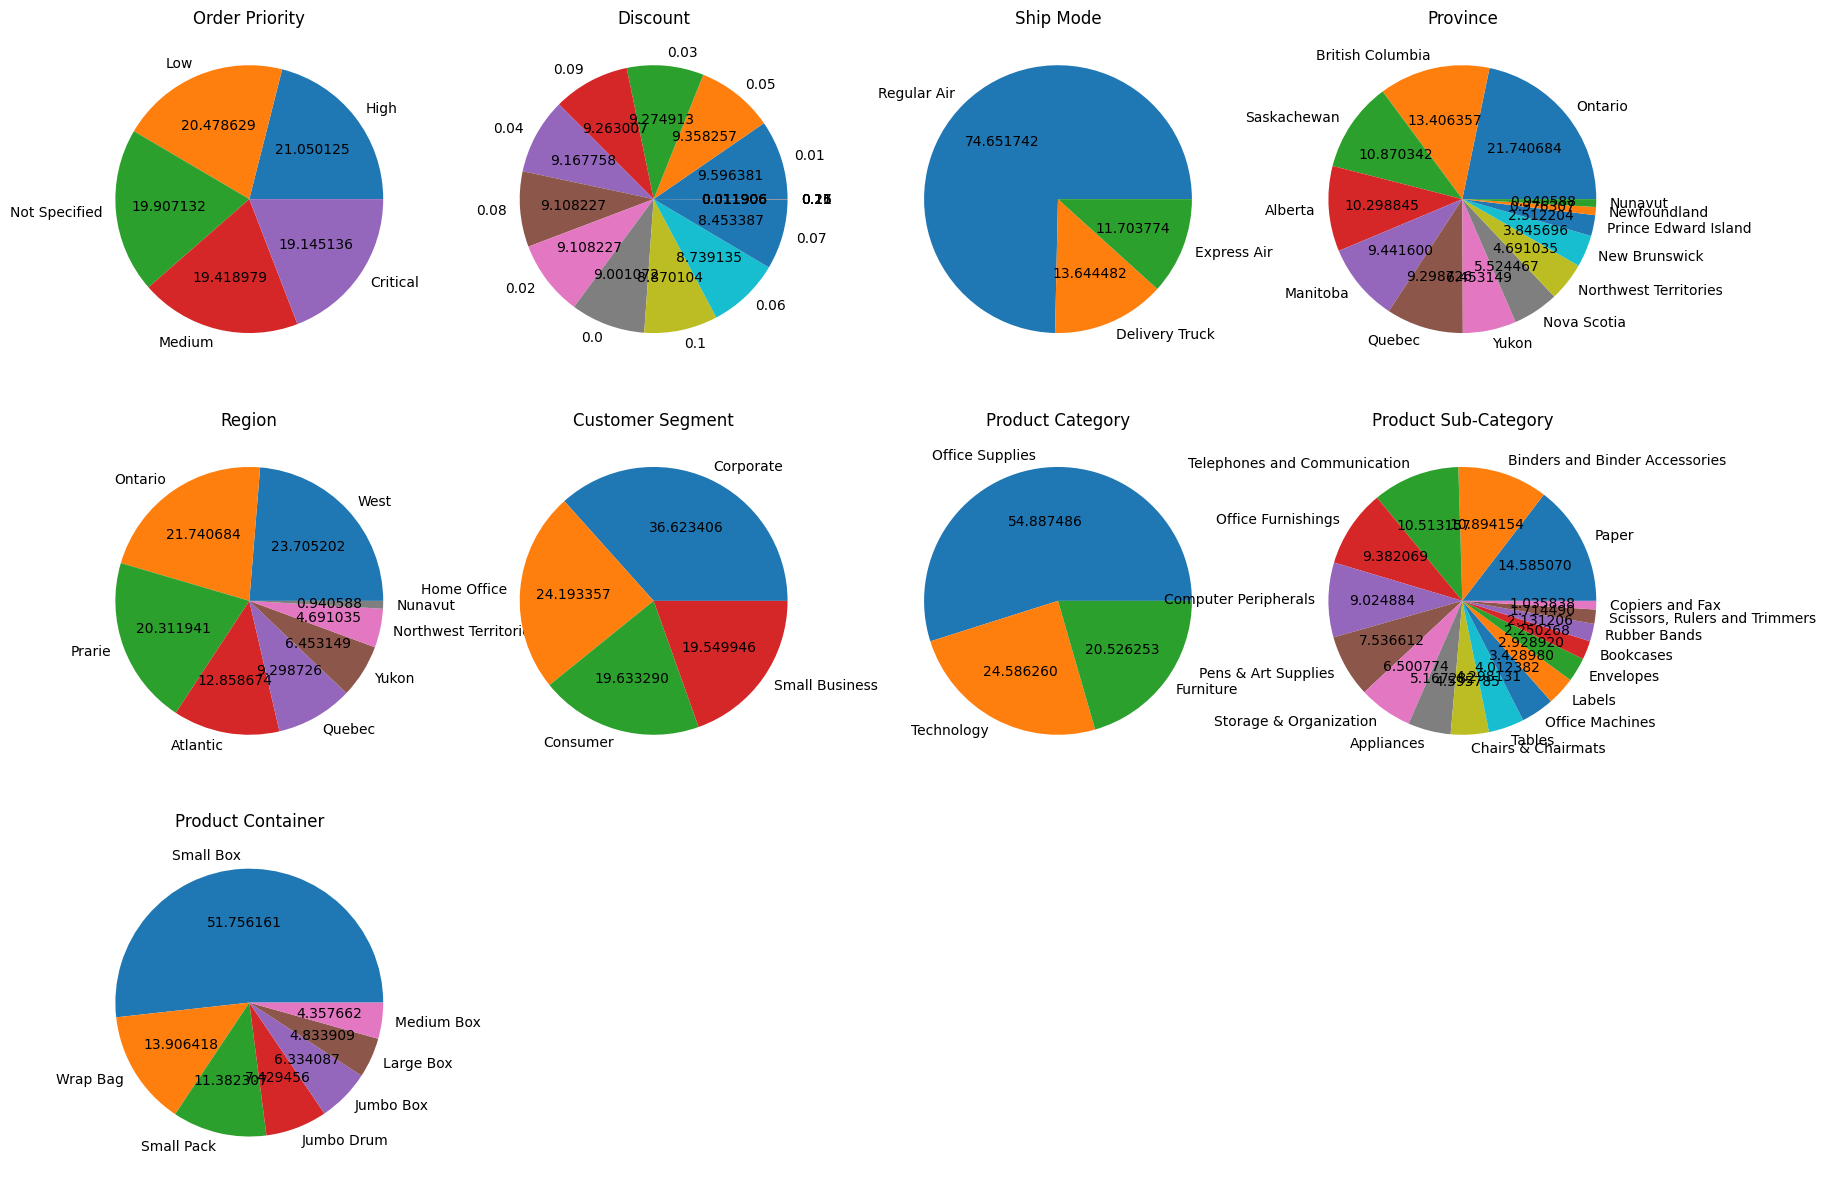

In [ ]:
ind = 1
plt.figure(figsize=(20,20))
for i in categorical_columns:
    ax = plt.subplot(4,4, ind)
    ax.set_title(i)
    ax.pie(categorical_columns[i], labels=categorical_columns[i].keys(), autopct= '%f')
    ind += 1
plt.show()

### Yearly Stats

In [ ]:
data['year'] = [t.year for t in pd.to_datetime(data['Order Date'])]
def calculate_yearly(column):
    yearly = {}
    for _,rows in data.iterrows():
        try:
            yearly[rows['year']] += rows[column]
        except KeyError:
            yearly[rows['year']] = rows[column]
    return yearly

##### Yearly profit, sales, total order, shipping cost, discount

In [ ]:
yearly_profit = calculate_yearly('Profit')
yearly_sales = calculate_yearly('Sales')
yearly_order_quantity = calculate_yearly('Order Quantity')
yearly_shipping_cost = calculate_yearly('Shipping Cost')
yearly_discount = calculate_yearly('Discount')

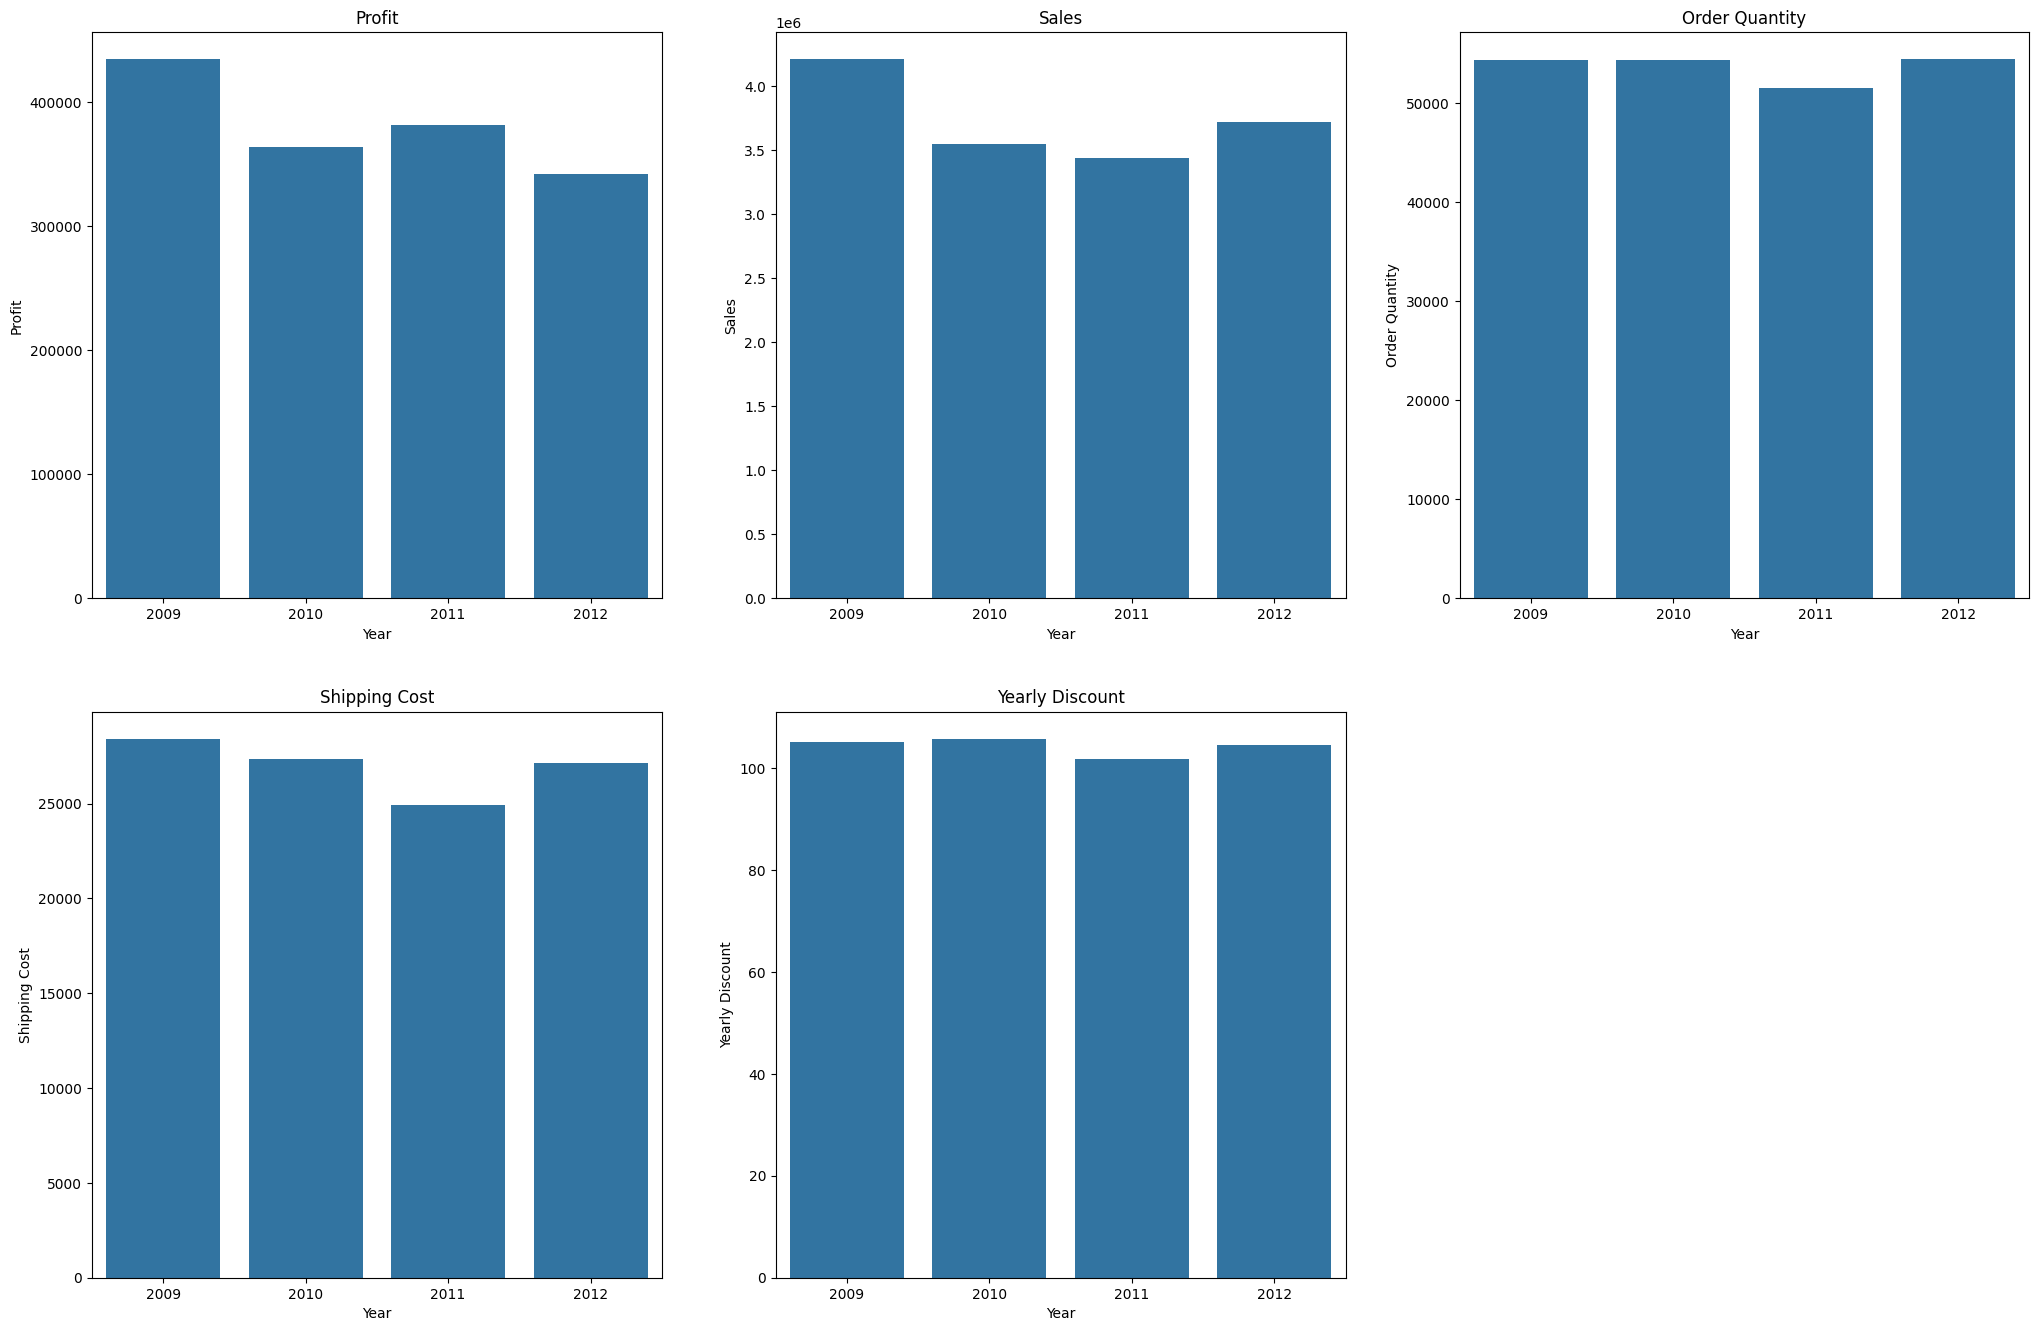

In [ ]:
ind = 1
plt.figure(figsize=(25,25))
for i,name in zip([yearly_profit, yearly_sales, yearly_order_quantity, yearly_shipping_cost, yearly_discount],["Profit","Sales","Order Quantity", "Shipping Cost", "Yearly Discount"]):
    ax = plt.subplot(3,3, ind)
    ax.set_title(name)
    sns.barplot(ax = ax,x=0, y=1,data=pd.DataFrame(sorted(i.items())))
    ax.set(xlabel="Year", ylabel = name)
    ind += 1

#### Historgram of profits and losses each year

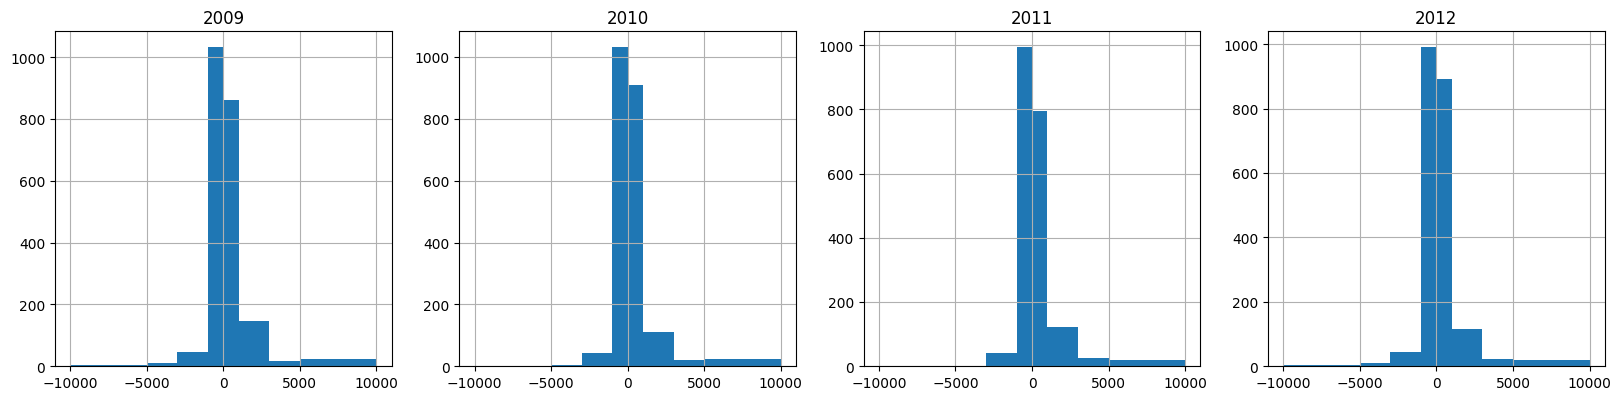

In [ ]:
years = sorted(list(pd.to_datetime(pd.to_datetime(data['Order Date']).values).year.unique()))
indx = 1
plt.figure(figsize = (20,20))
for y in years:
    ax = plt.subplot(4,4,indx)
    ax.set_title(y)
    indx +=1
    data['Profit'].where(data['year'] == y).hist(ax = ax,bins=[-10000,-5000,-3000,-1000,0,1000, 3000, 5000,10000])

#### Histogram of Profits each year

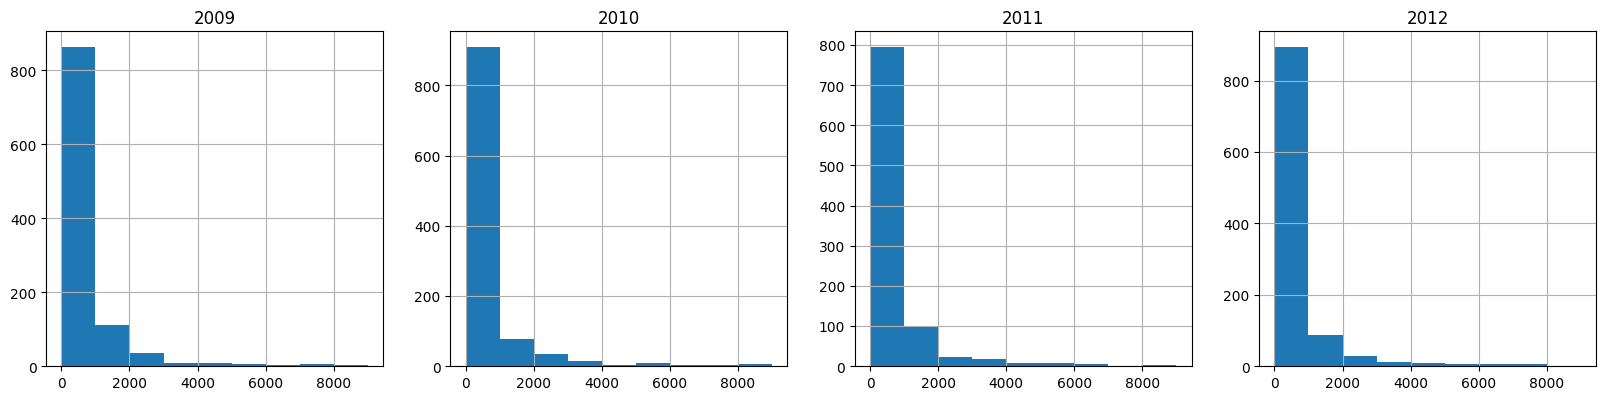

In [ ]:
indx = 1
plt.figure(figsize = (20,20))
for y in years:
    ax = plt.subplot(4,4,indx)
    ax.set_title(y)
    indx +=1
    data['Profit'].where(data['year'] == y).hist(ax = ax,bins=range(0, 10000,1000))

#### Number of orders sold on Profit vs Number of order sold on Loss each year

In [ ]:
yearly_profit_counts = {}
for y in years:
    yearly_profit_counts[y] = pd.cut(data['Profit'].where(data['year'] == y),bins=[-1000, 0, 1000], labels=["Orders sold on Loss", "Orders sold on Profit"]).value_counts()

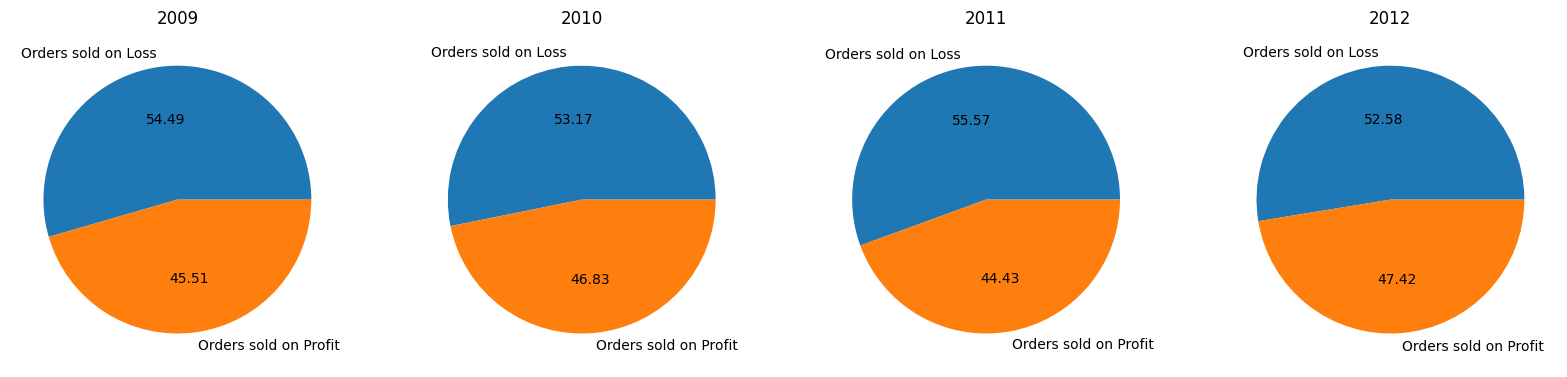

In [ ]:
plt.figure(figsize=(20,20))
index = 1
for e in yearly_profit_counts.keys():
    ax = plt.subplot(4,4, index)
    index += 1
    ax.set_title(e)
    ax.pie(yearly_profit_counts[e], labels=yearly_profit_counts[e].keys(),autopct='%.2f')

#### Product Category vs Profit

[Text(0.5, 0, 'Product Category'), Text(0, 0.5, 'Mean Profit')]

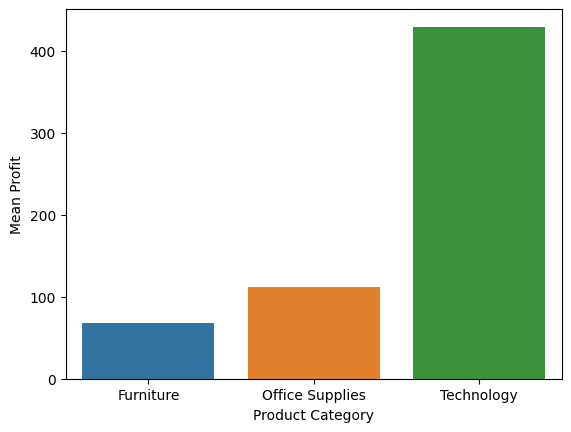

In [ ]:
t = data.groupby(['Product Category'])['Profit'].mean()
ax = sns.barplot(data = pd.DataFrame(t).transpose())
ax.set(xlabel= "Product Category", ylabel="Mean Profit")

Technology products are most profitable

#### Profit each year for every Product Category

In [ ]:
t = data.groupby(['Product Category','year'])['Profit'].sum()
def yearly_profit_of_category(category):
    yearly = {}
    for y in years:
        yearly[y] = data['Profit'].where(data['year'] == y).where(data['Product Category'] == category).sum()
    df = pd.DataFrame()
    df['year'] = yearly.keys()
    df['profit'] = yearly.values()
    return df

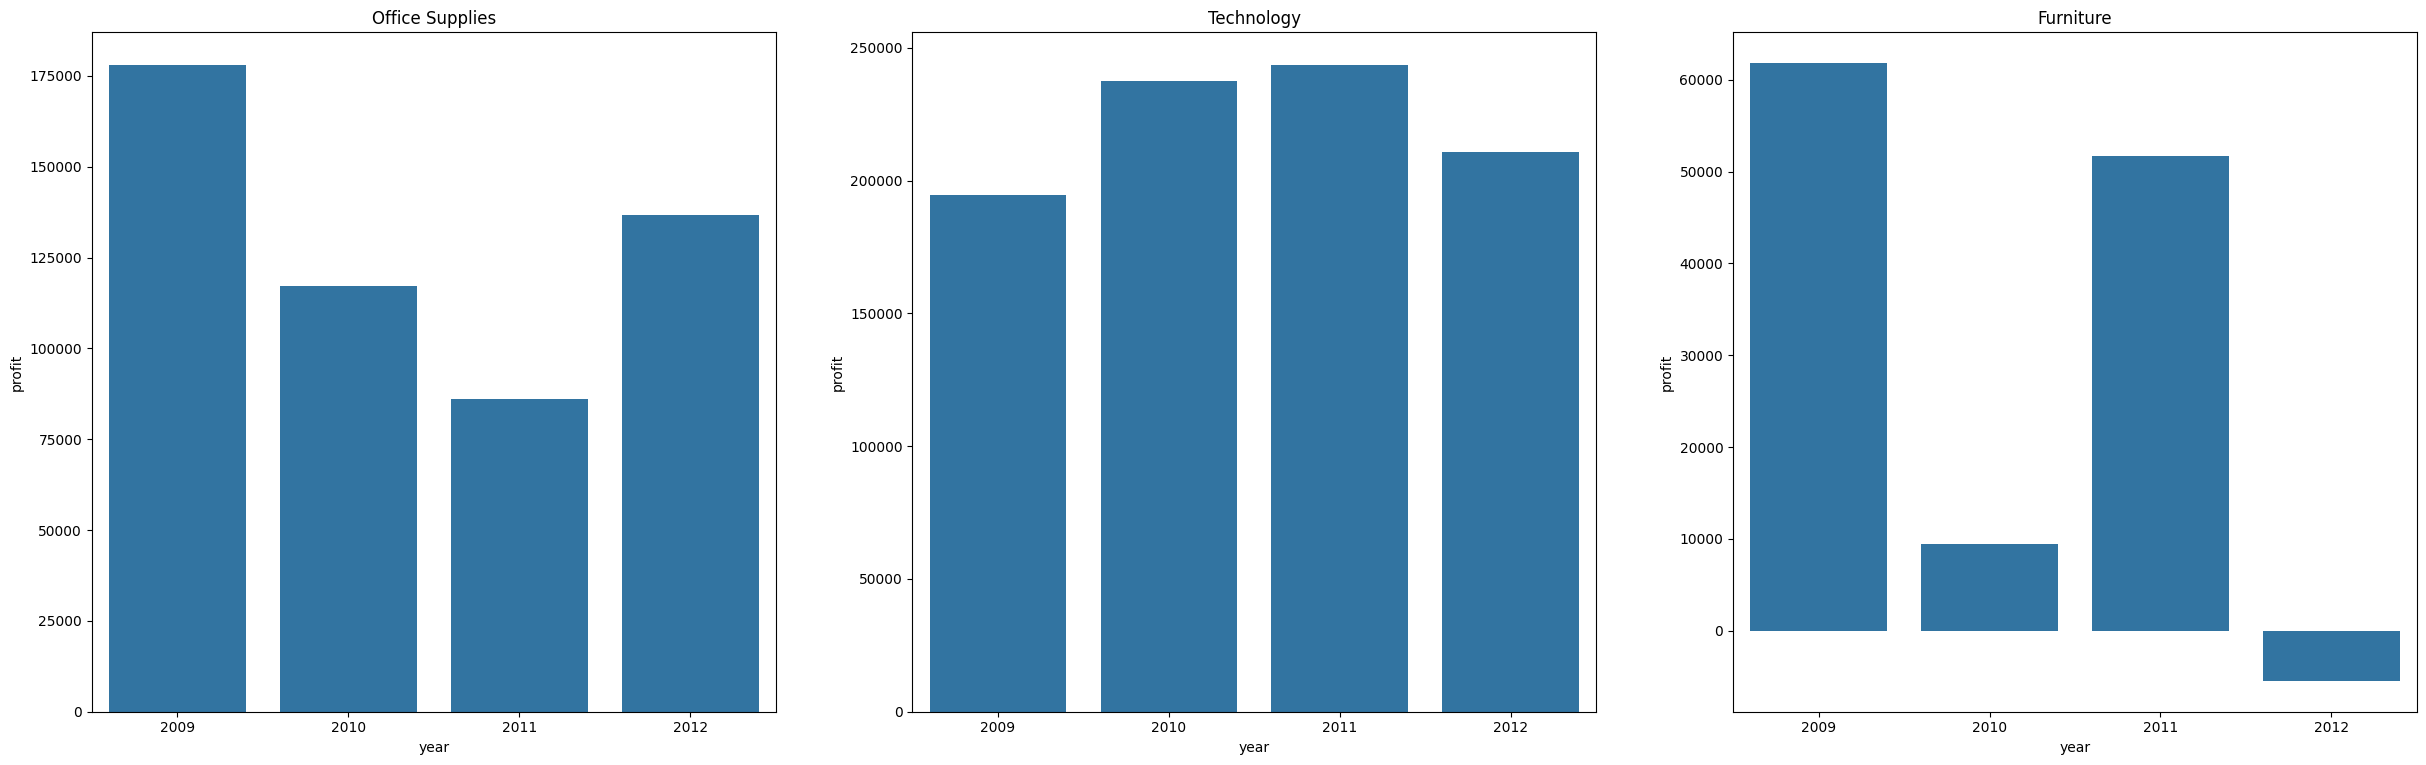

In [ ]:
products = list(data['Product Category'].unique())
plt.figure(figsize=(30,30))
ind = 1
for e in products:
    ax = plt.subplot(3,3, ind)
    ind += 1
    ax.set_title(e)
    sns.barplot(x = 'year', y = 'profit', data = yearly_profit_of_category(e))

In year 2012, furniture sales suffered loss due to which 2012 is the least profitable year

##### Yearly customer segment, product category, province, region distribution

In [ ]:
def yearly_distribution(column):
    yearly_customer_segments = data.groupby(data['year'])[column].value_counts()
    plt.figure(figsize=(30,30))
    ind = 1
    for y in years:
        ax = plt.subplot(4,4, ind)
        ind += 1
        ax.set_title(y)
        sns.barplot(data = pd.DataFrame(yearly_customer_segments[y]).transpose(), ax = ax)

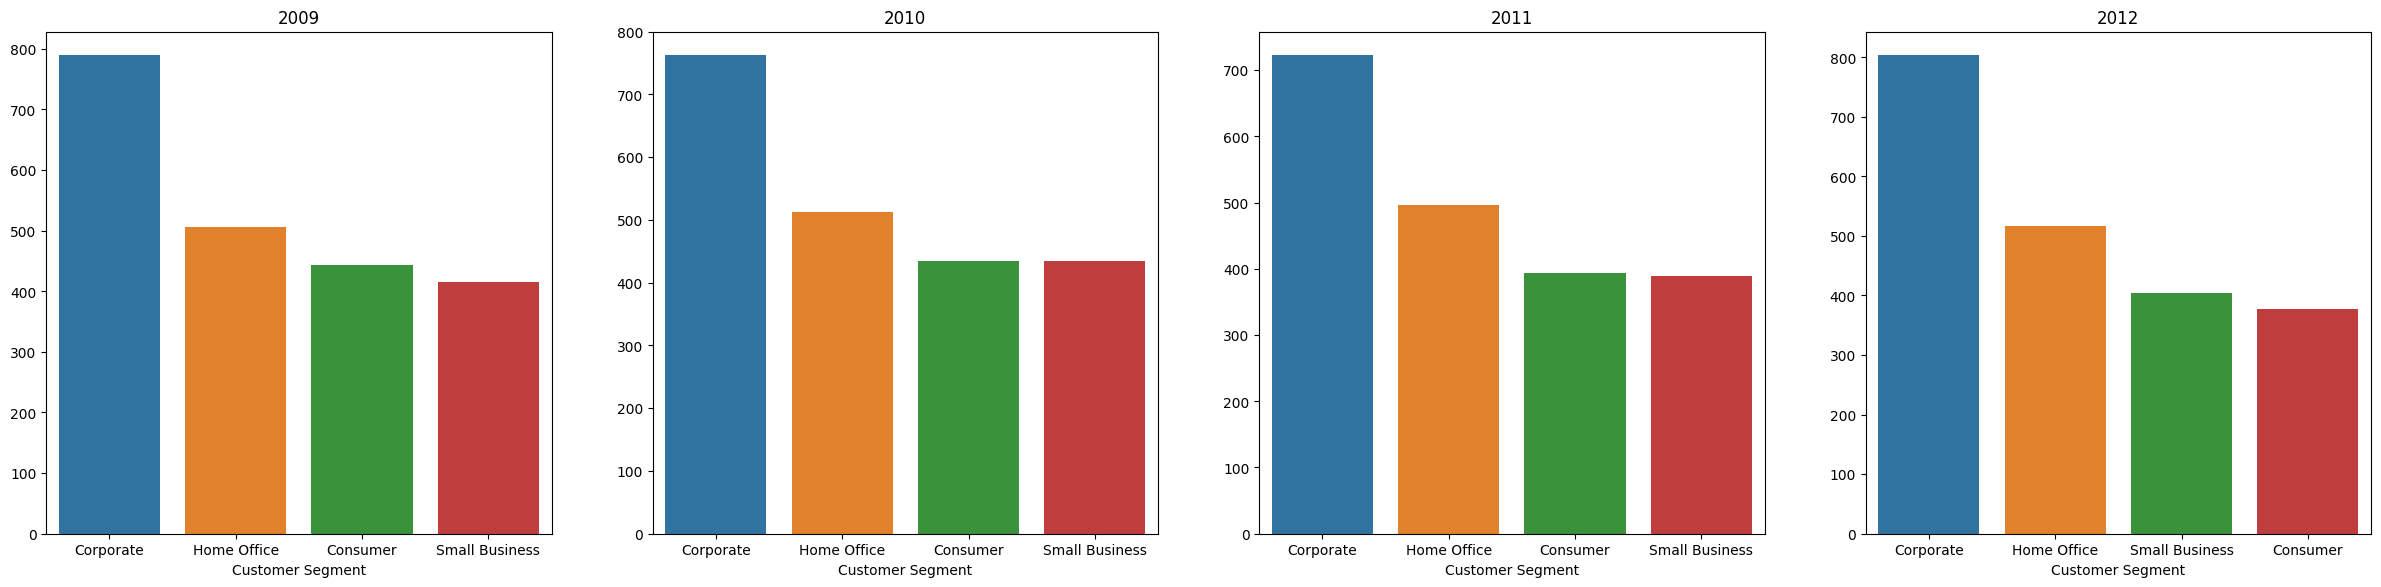

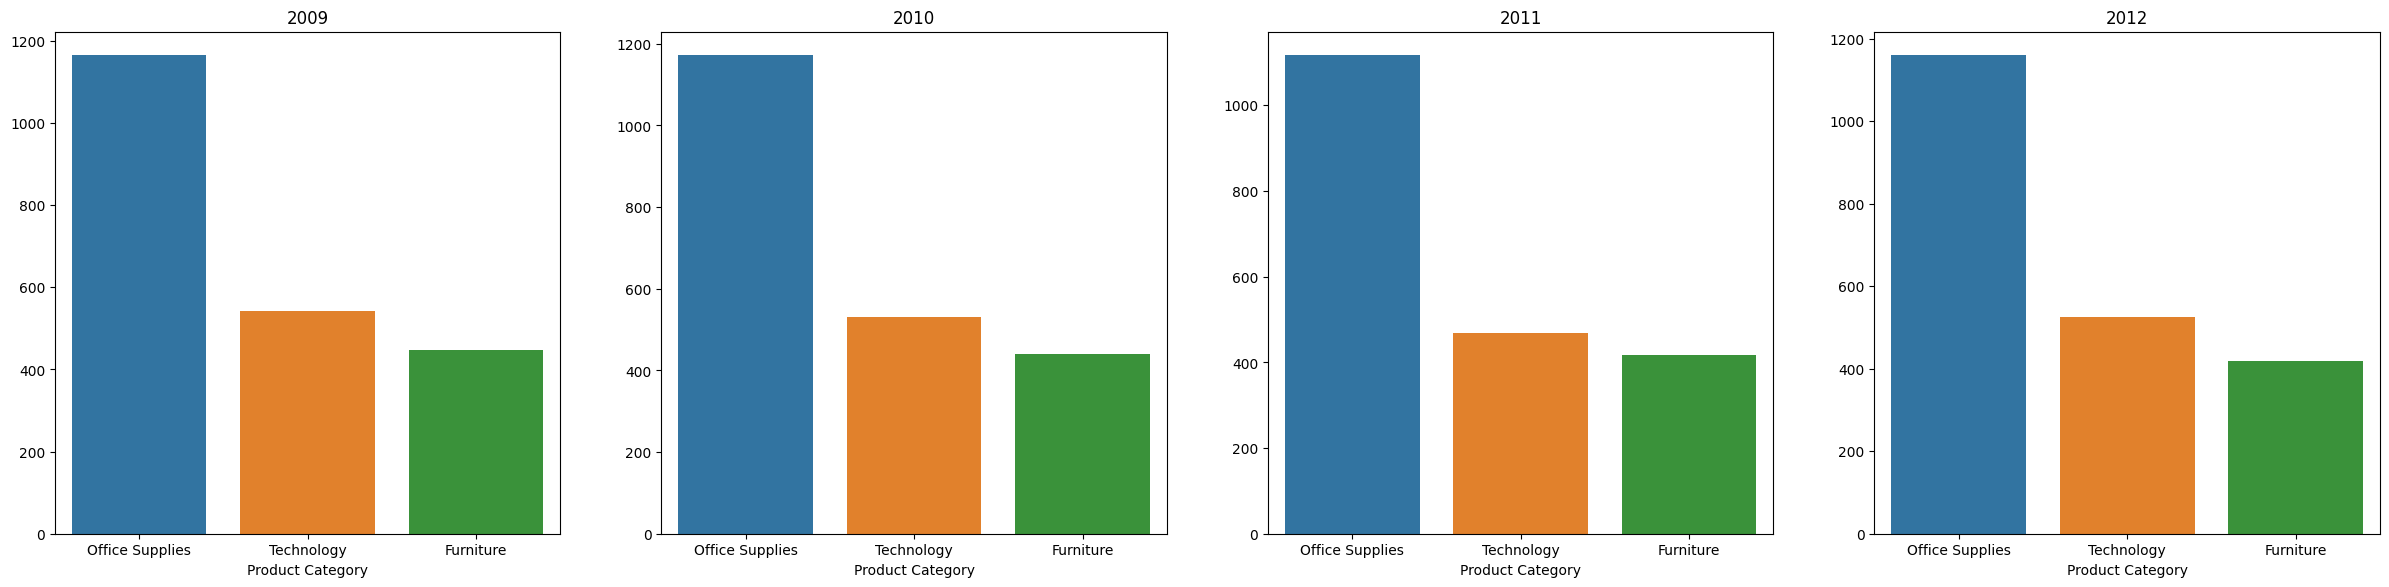

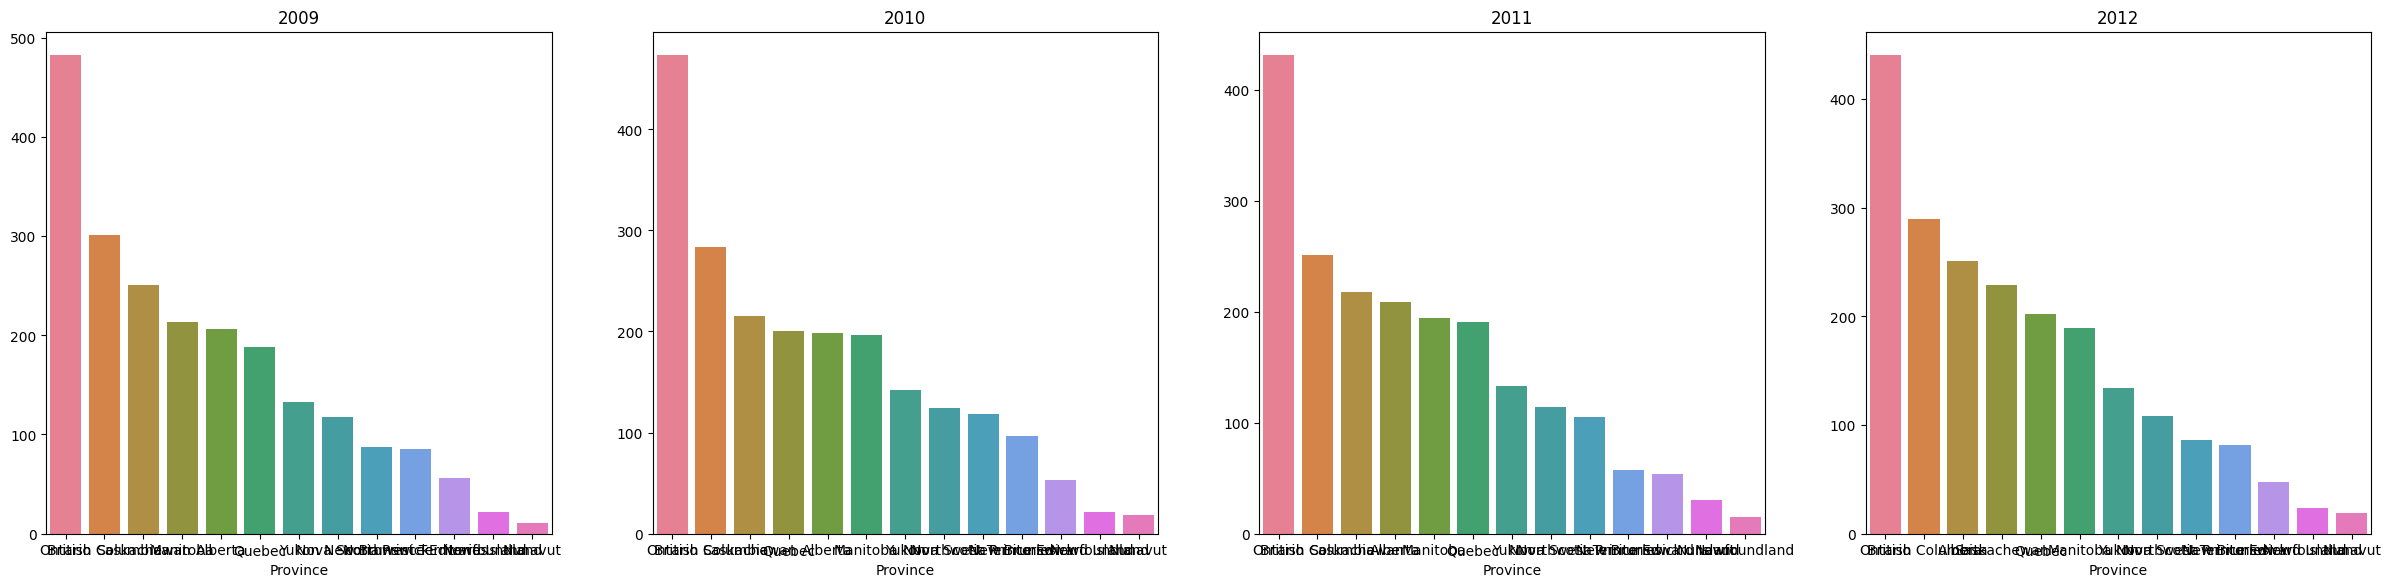

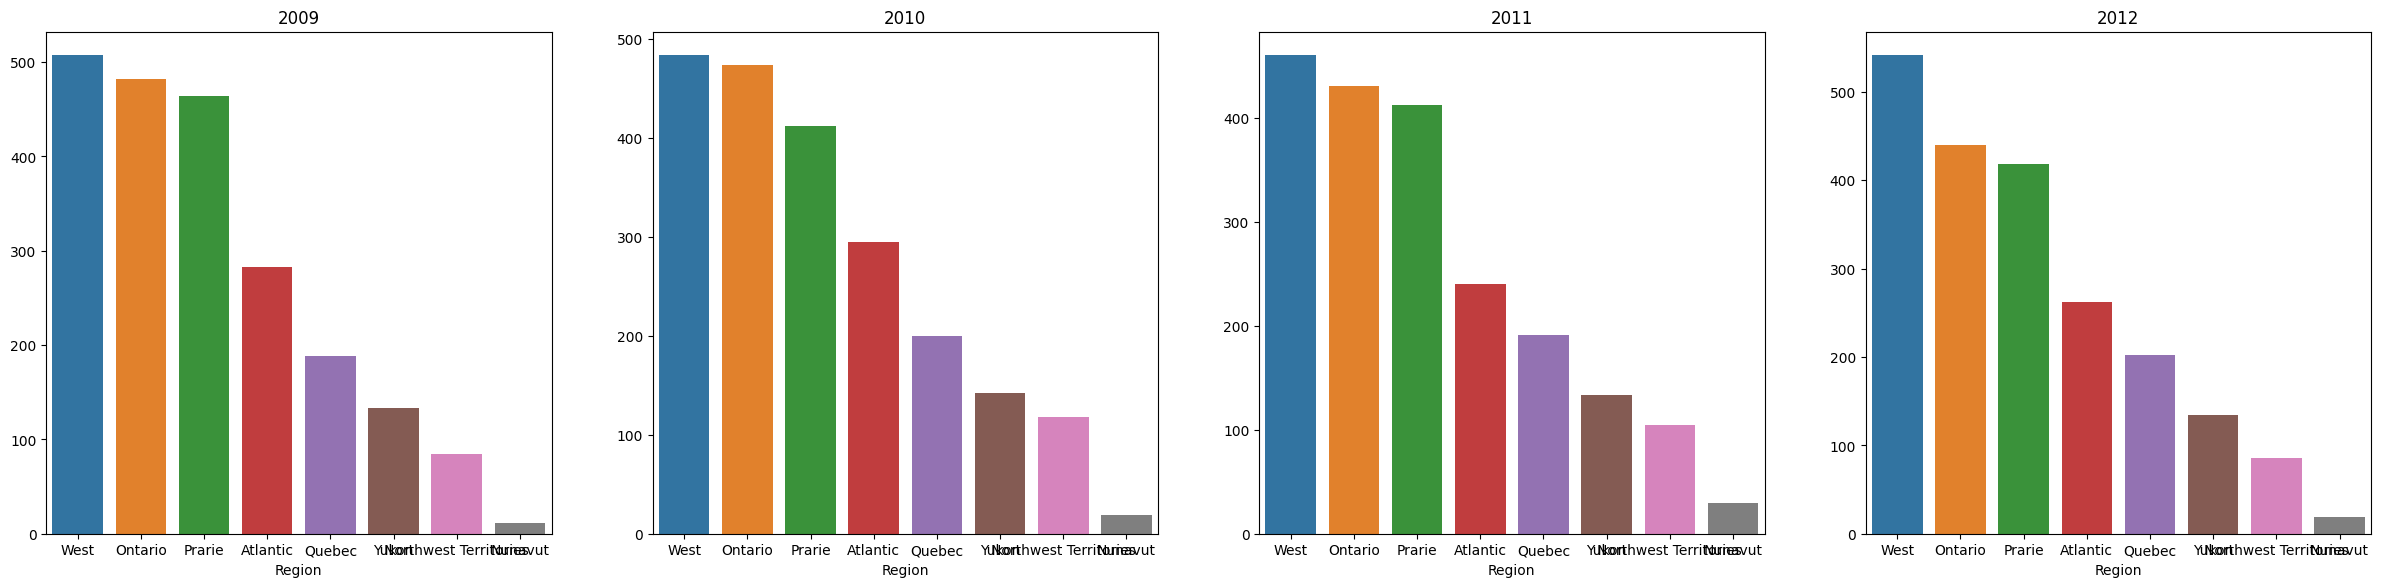

In [ ]:
yearly_distribution('Customer Segment')
yearly_distribution('Product Category')
yearly_distribution('Province')
yearly_distribution('Region')

### Monthly Stats

In [ ]:
def calculate_monthly(column):
    monthly_profit = {}
    month = {1:"Jan", 2: "Feb", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
    for _,rows in data.iterrows():
        try:
            monthly_profit[pd.to_datetime(rows['Order Date']).month] += rows[column]
        except KeyError:
            monthly_profit[pd.to_datetime(rows['Order Date']).month] = rows[column]
    d = {i[0]: i[1] for i in [(month[item[0]],item[1]) for item in sorted(monthly_profit.items())]}
    ax = sns.barplot(data=pd.DataFrame(d,index=[0]))
    ax.set(xlabel= "Month", ylabel=column)
    plt.show()

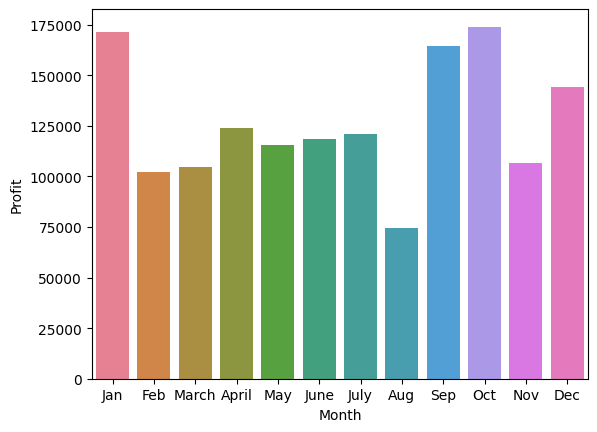

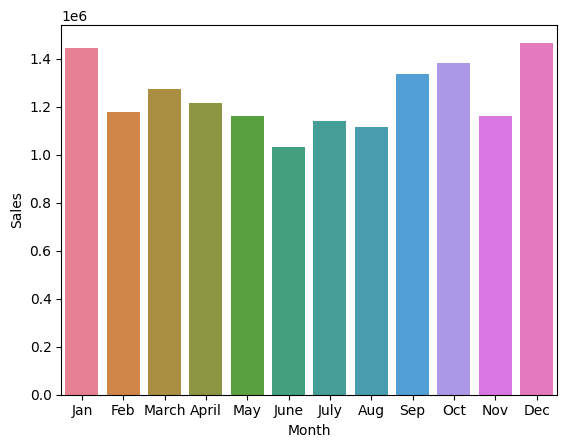

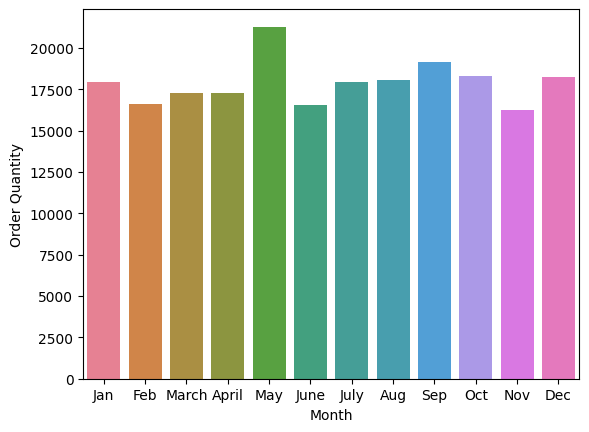

In [ ]:
calculate_monthly('Profit')
calculate_monthly('Sales')
calculate_monthly('Order Quantity')

### Decision Tree

In [ ]:
isProfit = []
for _, rows in data.iterrows():
    if rows['Profit'] > 0:
        isProfit.append(1)
    else:
        isProfit.append(0)
data['isProfit'] = isProfit

In [ ]:
data_for_training = data[['Order Quantity','Shipping Cost','Product Category', 'Unit Price', 'Sales']]
data_for_training = pd.get_dummies(data_for_training)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_for_training, data['isProfit'], test_size=0.33, random_state=42)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=data_for_training.columns,class_names=["Loss","Profit"], filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)

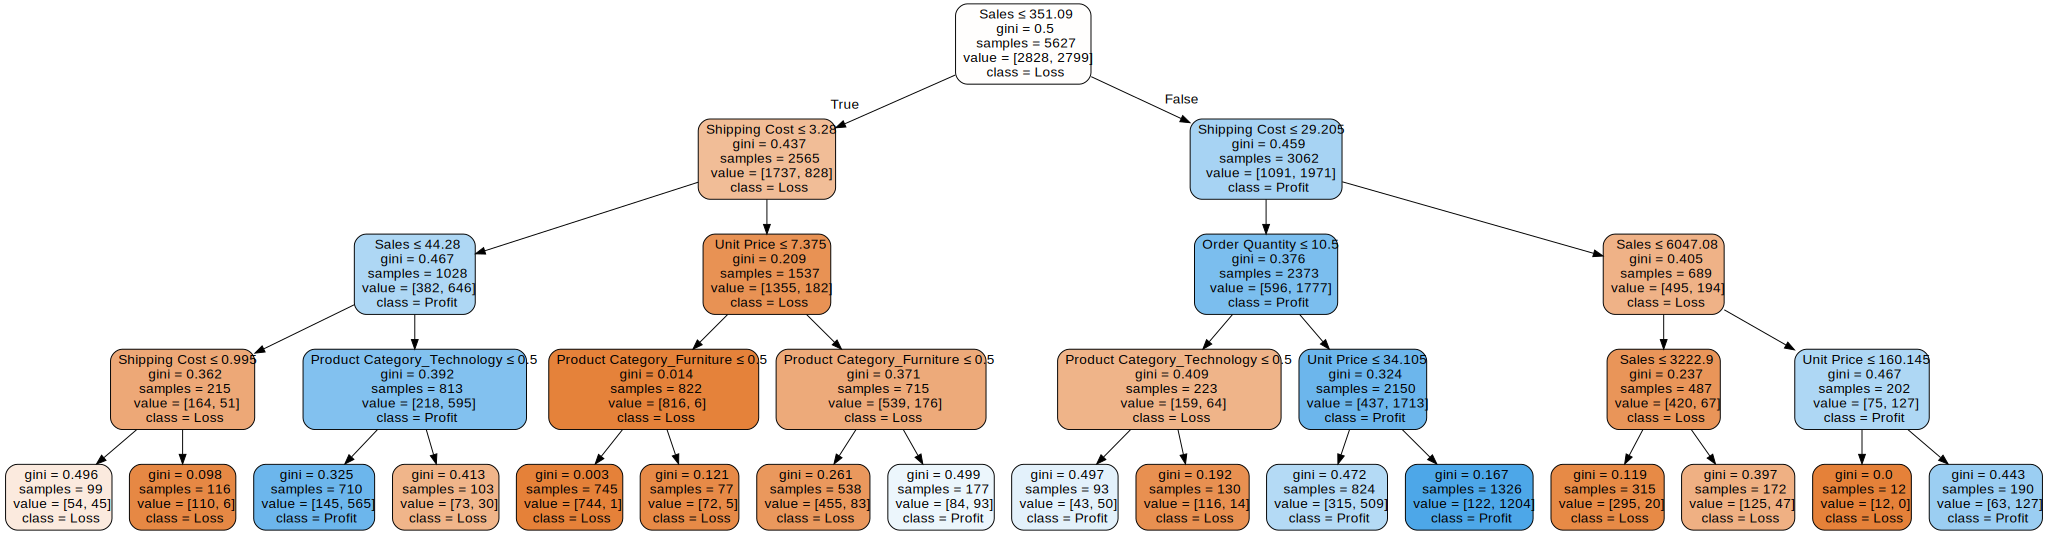

In [ ]:
graph

a) Orders with sales less than 350 mostly lead to loses except non technology orders with cheap shipping cost and comparative higher sales amount.
b) It is clear that orders with low sales amount, high shipping cost and low unit price mostly lead to losses. Assuming that shipping cost is incurred by the company it could be a business decision to sell cheap products even if the cost to transport is high so that more customers could try out the products which would ultimately lead in increasing the profits.
c) For orders above 350, low shipping cost and order quanity more than 10 lead to profits. Also orders with very high sales and high per unit cost are mostly profitable.